**Problem Statement**

You are hired by a sports analysis agency to understand the selection process of high school football players into college with a full or partial scholarship. You are provided details of 6215 high school graduates who have been inducted into 4-year degree colleges with either full or partial scholarships.  You have to help the agency in predicting whether a high school graduate will win a full scholarship on the basis of the information given in the data set. Also, find out the important factors which are instrumental in winning a full scholarship in colleges.





**Data Dictionary:**



**Scholarship** - Won a college scholarship: Full / Partial

**Academic Score**-High school academic performance of a candidate 

**Scores on Plays Made**-A composite score based on the achievements on the field

**Missed Play Score**- A composite score based on the failures on the field

**Injury Propensity** -This has 4 ordinal levels: High, Moderate, Normal and Low. It has been calculated based on what proportion of time a candidate had an injury problem

**School Type** -4 types of schools based on their location

**School Score**  - A composite score based on the overall achievement of the candidates’ school, based on the schools academic, sports and community service performance

**Overall Score** -A composite score based on a candidate’s family financial state, school performance, psychosocial attitude etc

**Region** -Region of the country where the school is located

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import os
from warnings import filterwarnings
filterwarnings("ignore")

In [140]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Predictive modelling  group assignment')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
import io
data=pd.read_csv("Football+Scholarship.csv")
data.head(5)

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
0,7.0,0.27,0.36,High,A,0.45,8.8,Eastern,Partial
1,6.3,0.30,0.34,Low,C,0.49,9.5,Eastern,Partial
2,8.1,0.28,0.40,Moderate,C,0.44,10.1,Eastern,Partial
3,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial
4,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial


In [142]:
data.shape

(6215, 9)

In [143]:
data.describe()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score
count,6215.000000,6215.000000,6215.000000,6215.000000,6215.000000
mean,7.219252,0.337338,0.319537,0.531448,10.456771
std,1.292237,0.160122,0.145153,0.147245,1.172504
min,3.800000,0.080000,0.000000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,0.510000,10.200000
75%,7.700000,0.400000,0.390000,0.600000,11.300000
max,15.900000,1.330000,1.660000,1.980000,14.900000


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6215 entries, 0 to 6214
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Academic_Score       6215 non-null   float64
 1   Score_on_Plays_Made  6215 non-null   float64
 2   Missed_Play_Score    6215 non-null   float64
 3   Injury_Propensity    6215 non-null   object 
 4   School_Type          6215 non-null   object 
 5   School_Score         6215 non-null   float64
 6   Overall_Score        6215 non-null   float64
 7   Region               6215 non-null   object 
 8   Scholarship          6215 non-null   object 
dtypes: float64(5), object(4)
memory usage: 437.1+ KB


In [145]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Academic_Score,6215.0,7.219252,1.292237,3.80,6.40,7.00,7.70,15.90
Score_on_Plays_Made,6215.0,0.337338,0.160122,0.08,0.23,0.29,0.40,1.33
Missed_Play_Score,6215.0,0.319537,0.145153,0.00,0.25,0.31,0.39,1.66
School_Score,6215.0,0.531448,0.147245,0.22,0.43,0.51,0.60,1.98
Overall_Score,6215.0,10.456771,1.172504,8.00,9.50,10.20,11.30,14.90


From the above observation maybe the Academic_score can have small amount of outliers

In [146]:
data.isnull().sum()

Academic_Score         0
Score_on_Plays_Made    0
Missed_Play_Score      0
Injury_Propensity      0
School_Type            0
School_Score           0
Overall_Score          0
Region                 0
Scholarship            0
dtype: int64

NO NULL VALUES IS FOUND

In [147]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data[dups].head()

Number of duplicate rows = 947


,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,Injury_Propensity,School_Type,School_Score,Overall_Score,Region,Scholarship
4,7.2,0.23,0.32,Moderate,C,0.40,9.9,Eastern,Partial
5,8.1,0.28,0.40,Moderate,C,0.44,10.1,Eastern,Partial
7,7.0,0.27,0.36,High,A,0.45,8.8,Eastern,Partial
8,6.3,0.30,0.34,Low,C,0.49,9.5,Eastern,Partial
36,7.3,0.24,0.39,High,D,0.36,8.6,Southern,Partial


In [148]:
data.drop_duplicates(keep='first',inplace=True)
data.shape

(5268, 9)

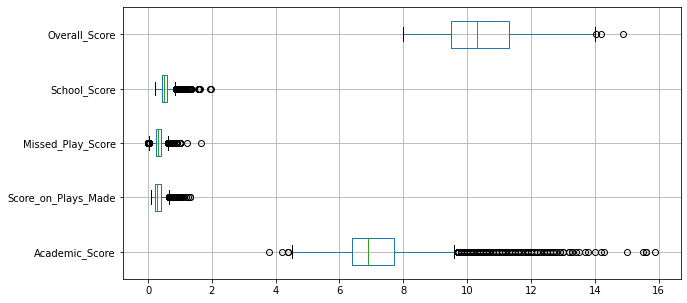

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
data.boxplot(vert=0)

plt.show()

So from the boxplot we can observe that  
1. Overall_Score variable have small amount of outlier compared to other continous variables
2. Academic_score Variable have large amount of outliers compared to other variables

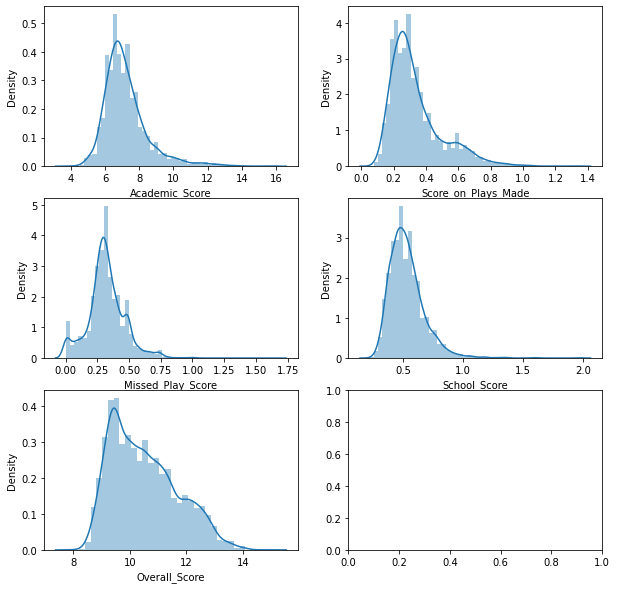

In [150]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,10)
a = sns.distplot(data['Academic_Score'],ax=axes[0][0])
a = sns.distplot(data['Score_on_Plays_Made'] , ax=axes[0][1])
a = sns.distplot(data['Missed_Play_Score'] , ax=axes[1][0])
a = sns.distplot(data['School_Score'] , ax=axes[1][1])
a = sns.distplot(data['Overall_Score'] , ax=axes[2][0])

plt.show()

From the above Histogram we can find that all numerical variable are right skewed 

In [151]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [152]:
lr,ur=remove_outlier(data["Academic_Score"])
data["Academic_Score"]=np.where(data["Academic_Score"]>ur,ur,data["Academic_Score"])
data["Academic_Score"]=np.where(data["Academic_Score"]<lr,lr,data["Academic_Score"])
lr,ur=remove_outlier(data["Score_on_Plays_Made"])
data["Score_on_Plays_Made"]=np.where(data["Score_on_Plays_Made"]>ur,ur,data["Score_on_Plays_Made"])
data["Score_on_Plays_Made"]=np.where(data["Score_on_Plays_Made"]<lr,lr,data["Score_on_Plays_Made"])
lr,ur=remove_outlier(data["Missed_Play_Score"])
data["Missed_Play_Score"]=np.where(data["Missed_Play_Score"]>ur,ur,data["Missed_Play_Score"])
data["Missed_Play_Score"]=np.where(data["Missed_Play_Score"]<lr,lr,data["Missed_Play_Score"])
lr,ur=remove_outlier(data["School_Score"])
data["School_Score"]=np.where(data["School_Score"]>ur,ur,data["School_Score"])
data["School_Score"]=np.where(data["School_Score"]<lr,lr,data["School_Score"])
lr,ur=remove_outlier(data["Overall_Score"])
data["Overall_Score"]=np.where(data["Overall_Score"]>ur,ur,data["Overall_Score"])
data["Overall_Score"]=np.where(data["Overall_Score"]<lr,lr,data["Overall_Score"])


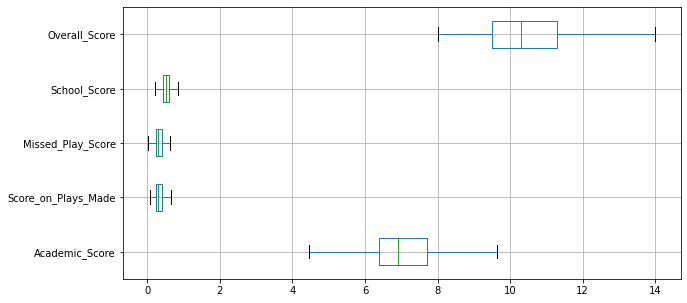

In [153]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
data.boxplot(vert=0)

plt.show()

So after the Outlier treatment we can observe the box plot that there is no outlier , by this outlier handling method we can able to avoid the loss of  information in the dataset

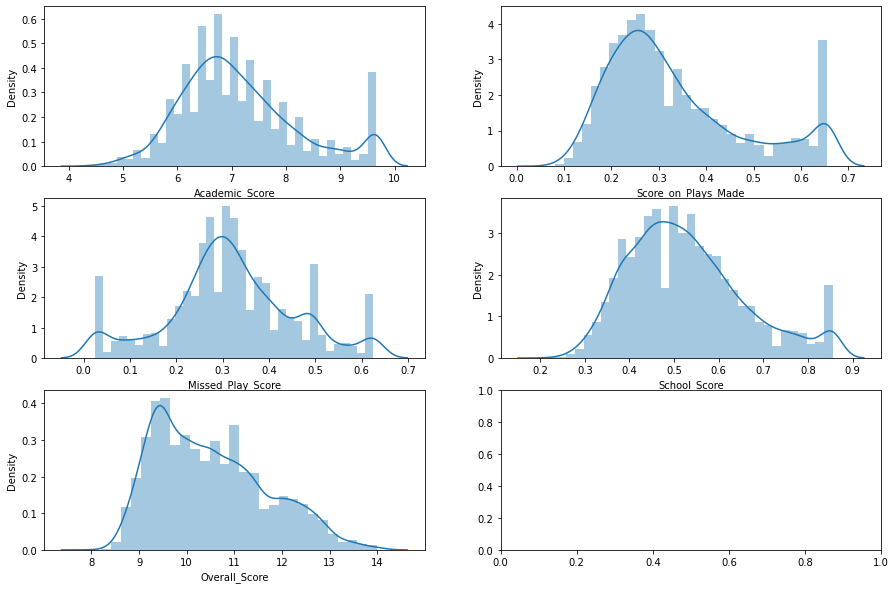

In [154]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,10)
a = sns.distplot(data['Academic_Score'],ax=axes[0][0])
a = sns.distplot(data['Score_on_Plays_Made'] , ax=axes[0][1])
a = sns.distplot(data['Missed_Play_Score'] , ax=axes[1][0])
a = sns.distplot(data['School_Score'] , ax=axes[1][1])
a = sns.distplot(data['Overall_Score'] , ax=axes[2][0])

plt.show()

So after the Outlier treatment we can observe that the skewed distributuin is converted to Normal distribution

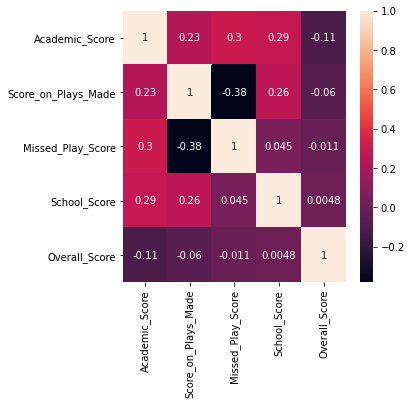

In [155]:
plot.figure(figsize=(5,5))
sns.heatmap(data.corr(),annot=True)
plot.show()

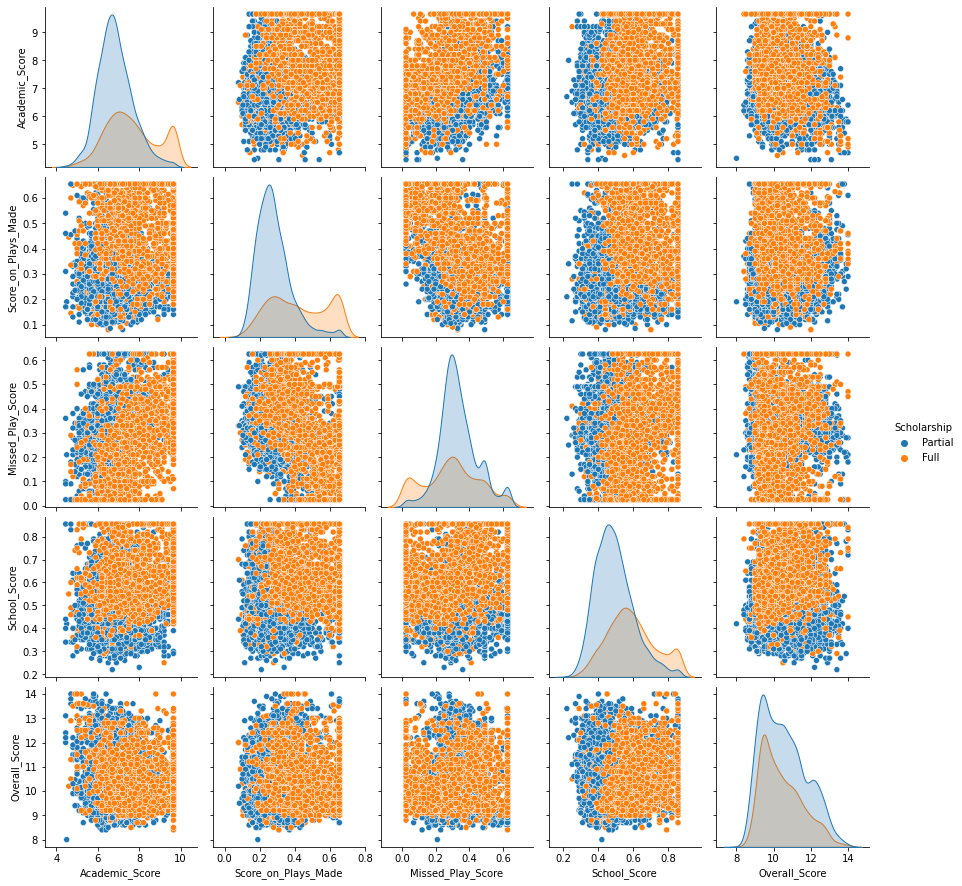

In [156]:
sns.pairplot(data,hue="Scholarship")

In [157]:
# Chi 2 test for finding the feature importance
# only considering the categorical variables
df=data[['Injury_Propensity','Region','Scholarship','School_Type']]
df.head(2)

,Injury_Propensity,Region,Scholarship,School_Type
0,High,Eastern,Partial,A
1,Low,Eastern,Partial,C


In [158]:
print(data['Injury_Propensity'].value_counts())
print(data['Region'].value_counts())
print(data['School_Type'].value_counts())


Low         2323
Normal      1162
Moderate     893
High         890
Name: Injury_Propensity, dtype: int64
Eastern     2403
Western     1457
Southern    1408
Name: Region, dtype: int64
C    2906
B    1446
D     786
A     130
Name: School_Type, dtype: int64


In [159]:
# label encodeing for two classes in the variables 
df['Scholarship']=np.where(df['Scholarship']=='Partial',0,1)
#label encoding for more than two categories
ordinal_labels = {k: i for i, k in enumerate(df['Region'].unique(),0)}
ordinal_labels1 = {k: i for i, k in enumerate(df['Injury_Propensity'].unique(),0)}
ordinal_labels2 = {k: i for i, k in enumerate(df['School_Type'].unique(),0)}


df['Region'] =  df['Region'].map(ordinal_labels )
df['Injury_Propensity'] = df['Injury_Propensity'].map(ordinal_labels1)
df['School_Type'] = df['School_Type'].map(ordinal_labels2)

df.head(2)

,Injury_Propensity,Region,Scholarship,School_Type
0,0,0,0,0
1,1,0,0,1


In [160]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['Injury_Propensity','Region','School_Type']],
                                               df['Scholarship'],test_size=0.3,random_state=0)

In [161]:
# chi2 test returns f score and p value 
from sklearn.feature_selection import chi2
f_p_value=chi2(X_train,y_train)
print(f_p_value)

# 1st array is the f score- Higher the f score higher the important the feature is for model
# 2nd array is the p value -Lower the p value higher the important the feature is for the  model
import pandas as pd

p_values=pd.Series(f_p_value[1])
p_values.index=X_train.columns
print(p_values.sort_index(ascending=False))


(array([20.3510347 , 24.2346512 ,  0.21811514]), array([6.44582240e-06, 8.52840144e-07, 6.40479855e-01]))
School_Type          6.404799e-01
Region               8.528401e-07
Injury_Propensity    6.445822e-06
dtype: float64


From the above chi2 we can  find that 'Region' column is most important column when compared to Sholarship column

**TEST OF PROPROTIONS**

In [162]:
from scipy.stats import chisquare
School_Type=chisquare(data['School_Type'].value_counts())
Region=chisquare(data['Region'].value_counts())
Injury_Propensity=chisquare(data['Injury_Propensity'].value_counts())


print('The test of  proportions P value  for each column respectively are:\n',School_Type[1],Region[1],Injury_Propensity[1])

The test of  proportions P value  for each column respectively are:
 0.0 1.5983140044235471e-78 7.68115806851711e-230


**Checkinng the balance of the classes in the  target variable**

Partial    63.344723
Full       36.655277
Name: Scholarship, dtype: float64


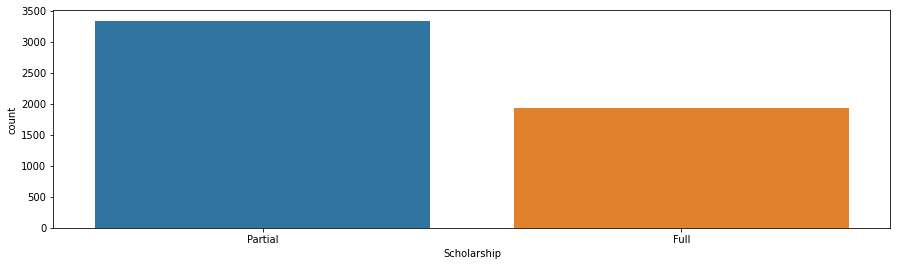

In [163]:
print((((data['Scholarship'].value_counts())/len(data))*100))
sns.countplot(data["Scholarship"])

as we can find there 63% of data belongs to Partial Class and rest 37% belongs to Full class, there is little amount of class imbalance. In industries it is a  balanced dataset , but for our practice we are applying SMOTE method to  rectify the class imbalance

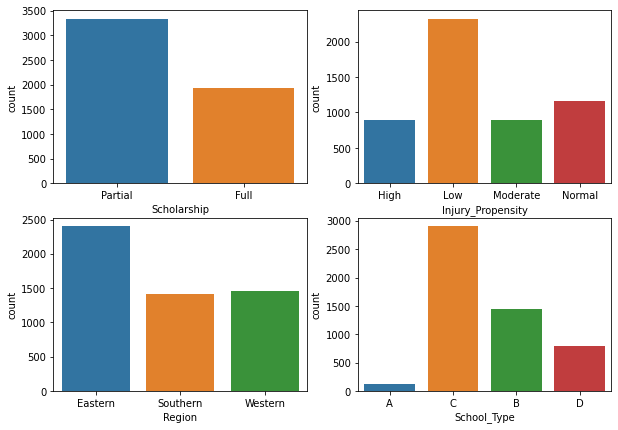

In [164]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,7)
plt.tick_params(labelsize=10)

a = sns.countplot(data["Scholarship"],ax = axes[0][0])
a = sns.countplot(data["Injury_Propensity"],ax=axes[0][1])
a = sns.countplot(data["Region"],ax=axes[1][0])
a = sns.countplot(data["School_Type"],ax=axes[1][1])




plt.show()

#import seaborn as sns
#plt.figure(figsize=(5,5))
#sns.set_theme(style="darkgrid")
#ax = sns.countplot(x="Scholarship", data=data)

**Bivariate Analysis**

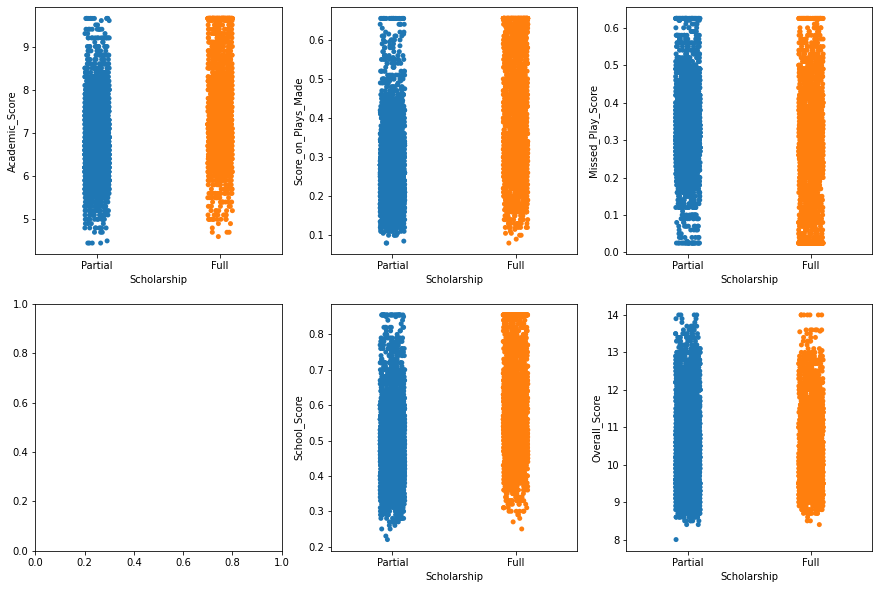

In [165]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(15,10)
plt.tick_params(labelsize=10)

a = sns.stripplot(data["Scholarship"], data['Academic_Score'],jitter=True,ax = axes[0][0])
a = sns.stripplot(data["Scholarship"], data['Score_on_Plays_Made'],jitter=True,ax = axes[0][1])
a = sns.stripplot(data["Scholarship"], data['Missed_Play_Score'],jitter=True,ax = axes[0][2])
a = sns.stripplot(data["Scholarship"], data['School_Score'],jitter=True,ax = axes[1][1])
a = sns.stripplot(data["Scholarship"], data['Overall_Score'],jitter=True,ax = axes[1][2])

plt.show()

#plt.figure(figsize=(5,5))
#sns.stripplot(data["Scholarship"], data['Academic_Score'], jitter=True) 
#plt.show()

**Feature Enginneering**

In [166]:
# Converting categorical variables into COntinuous variables
for column in data.columns:
    if data[column].dtype =='object':
        print(column.upper(),': ',data[column].nunique())

INJURY_PROPENSITY :  4
SCHOOL_TYPE :  4
REGION :  3
SCHOLARSHIP :  2


In [167]:
cat=[]
num=[]
for i in data.columns:
    if data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Injury_Propensity', 'School_Type', 'Region', 'Scholarship']
['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score', 'School_Score', 'Overall_Score']


In [168]:
# dropping  the Scholarship feature as it is a target variable
cat1=['Injury_Propensity','School_Type','Region']

In [169]:
#We are applying the One-Hot method  for converting the columns
data =pd.get_dummies(data, columns=cat1,drop_first=True)
data['Scholarship']=np.where(data['Scholarship']=='Partial',0,1)
data.head(2)


,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score,Scholarship,Injury_Propensity_Low,Injury_Propensity_Moderate,Injury_Propensity_Normal,School_Type_B,School_Type_C,School_Type_D,Region_Southern,Region_Western
0,7.0,0.27,0.36,0.45,8.8,0,0,0,0,0,0,0,0,0
1,6.3,0.30,0.34,0.49,9.5,0,1,0,0,0,1,0,0,0


**Clustering for finding the clusters for getting inference on the data**







In [170]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

#Scalling the data for performing clusitering
data1=data[['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score','School_Score', 'Overall_Score', 'Injury_Propensity_Low','Injury_Propensity_Moderate', 'Injury_Propensity_Normal','School_Type_B', 'School_Type_C', 'School_Type_D', 'Region_Southern','Region_Western','Scholarship']]



X_norm = StandardScaler()

# normalize all the columns of the dataframe 'X_filtered'
num_norm = X_norm.fit_transform(data1)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X = pd.DataFrame(num_norm, columns = data1.columns)

X.head()

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score,Injury_Propensity_Low,Injury_Propensity_Moderate,Injury_Propensity_Normal,School_Type_B,School_Type_C,School_Type_D,Region_Southern,Region_Western,Scholarship
0,-0.124606,-0.429870,0.312436,-0.592276,-1.457166,-0.888141,-0.451790,-0.531978,-0.61509,-1.109195,-0.41877,-0.603959,-0.618316,-0.760699
1,-0.775311,-0.220156,0.164422,-0.283778,-0.858102,1.125947,-0.451790,-0.531978,-0.61509,0.901555,-0.41877,-0.603959,-0.618316,-0.760699
2,0.897931,-0.359965,0.608463,-0.669400,-0.344620,-0.888141,2.213417,-0.531978,-0.61509,0.901555,-0.41877,-0.603959,-0.618316,-0.760699
3,0.061310,-0.709487,0.016408,-0.977898,-0.515781,-0.888141,2.213417,-0.531978,-0.61509,0.901555,-0.41877,-0.603959,-0.618316,-0.760699
4,-0.868268,-0.080348,-1.167700,-0.438027,-0.772522,-0.888141,2.213417,-0.531978,-0.61509,0.901555,-0.41877,-0.603959,-0.618316,1.314580


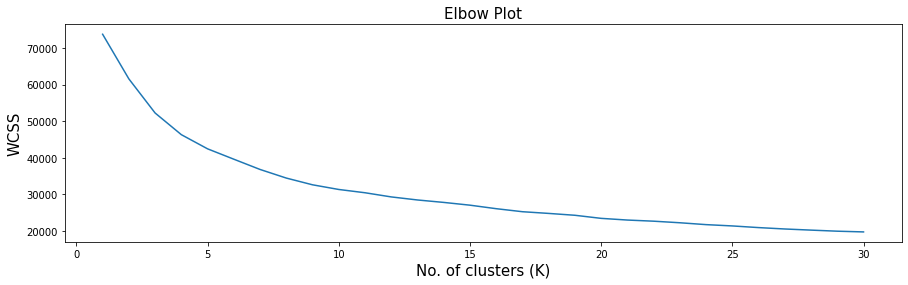

In [171]:
#K means Clustering
# create several cluster combinations ranging from 1 to 20 and observe the wcss (Within Cluster Sum of Squares) for each cluster
# consider an empty list to store the WCSS
import matplotlib.pyplot as plt
wcss  = []
for i in range(1,31): # we are plotting 1 to 20 clusters to check  the ideal number of clusters (x axis)
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X) # fitting the X data which has been scalled
    wcss.append(kmeans.inertia_)
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,31), wcss)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

In [172]:
# Performing the clusters using the Silhoutte score for finding the optimal number of clusters

# create a list for different values of K
n_clusters = [2, 3, 4, 5,6,7]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(X)
    score = silhouette_score(X, predict, random_state= 10)
    print ("For {} clusters the silhouette score is {})".format(K, score))

For 2 clusters the silhouette score is 0.17564294256375204)
For 3 clusters the silhouette score is 0.21082670668405612)
For 4 clusters the silhouette score is 0.22706010976836782)
For 5 clusters the silhouette score is 0.21162147493357283)
For 6 clusters the silhouette score is 0.21802345602437143)
For 7 clusters the silhouette score is 0.23316623050467059)


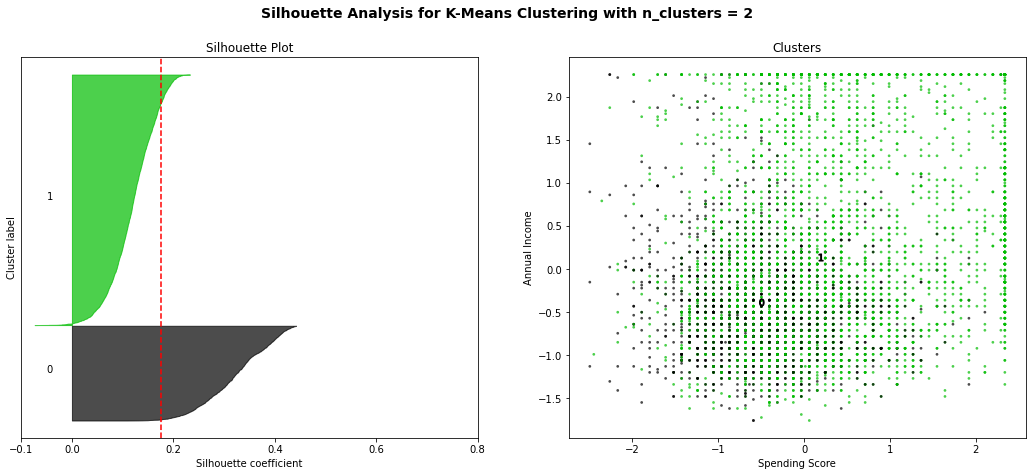

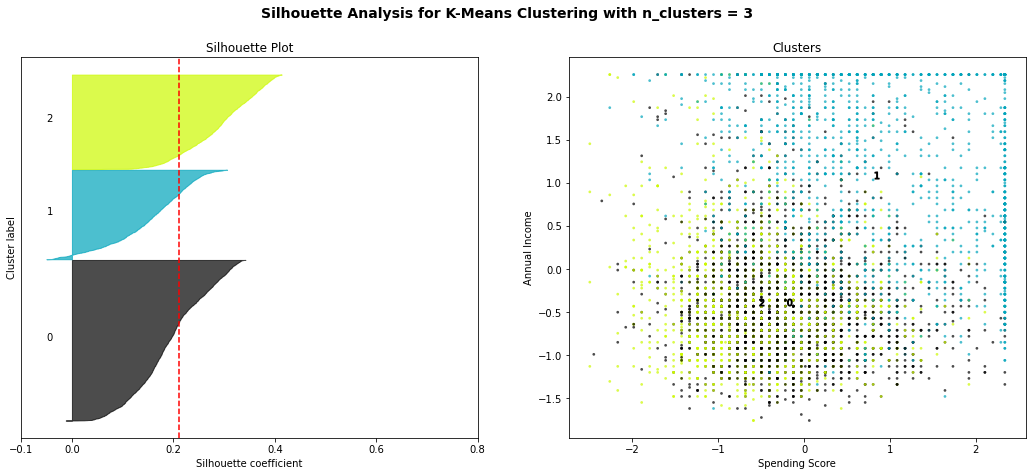

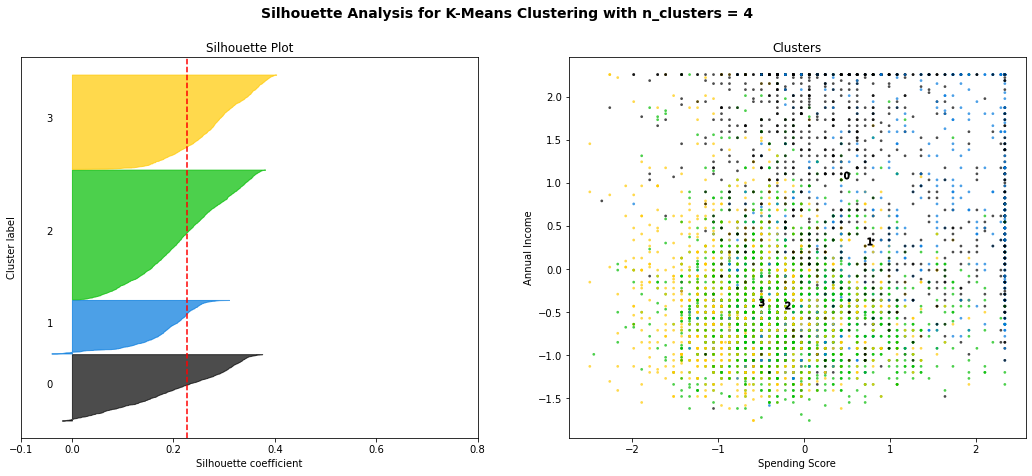

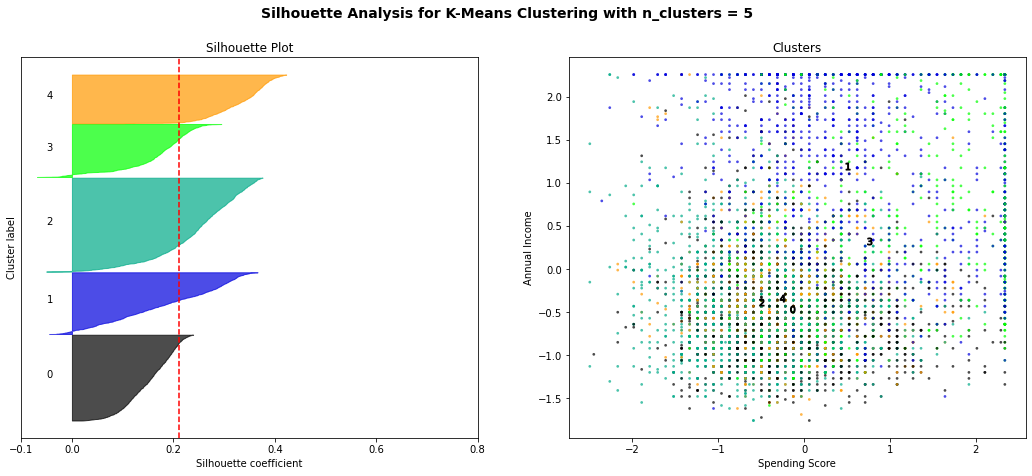

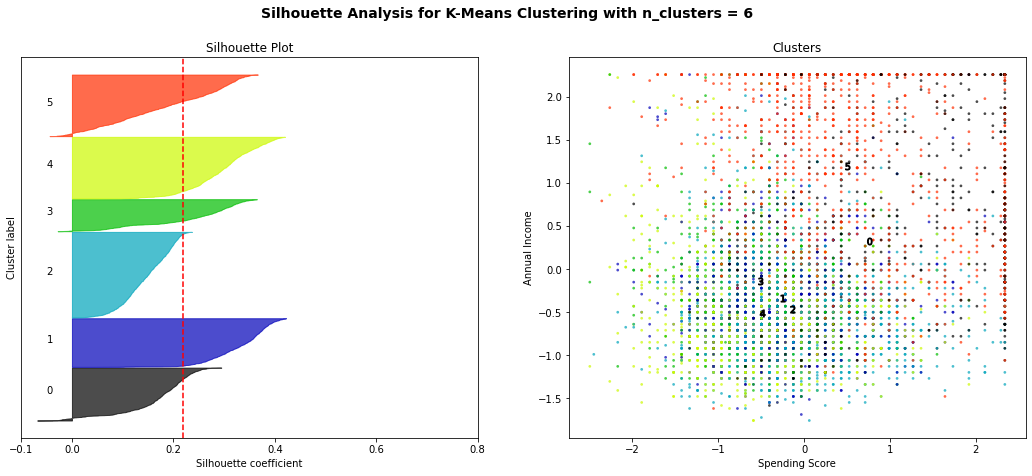

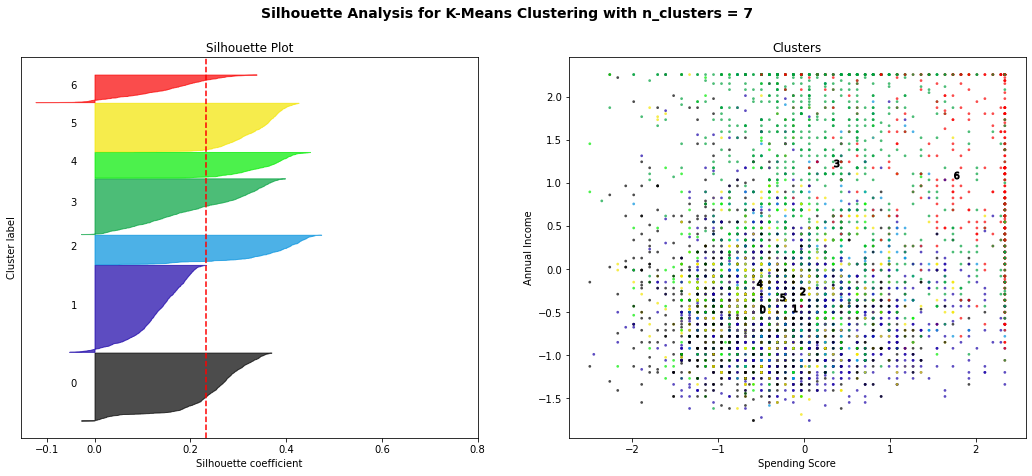

In [173]:
import matplotlib.cm as cm
# consider the number of clusters
n_clusters = [2,3,4,5,6,7]

# consider an array of the data
X = np.array(X)

# for each value of K, plot the silhouette plot the clusters formed
for K in n_clusters:
    
    # create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    # set the figure size
    fig.set_size_inches(18, 7)

    # the 1st subplot is the silhouette plot
    # initialize the cluster with 'K' value and a random generator
    model = KMeans(n_clusters = K, random_state = 10)
    
    # fit and predict on the scaled data
    cluster_labels = model.fit_predict(X)

    # the 'silhouette_score()' gives the average value for all the samples
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(K):
        
        # aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        # sort the silhouette coefficient
        ith_cluster_silhouette_values.sort()
        
        # calculate the size of the cluster
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color each cluster 
        color = cm.nipy_spectral(float(i) / K)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10 

    # set the axes and plot label
    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Cluster label")

    # plot the vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # clear the y-axis ticks
    ax1.set_yticks([])  
    
    # set the ticks for x-axis 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

    
    # 2nd plot showing the actual clusters formed
    # consider different color for each cluster
    colors = cm.nipy_spectral(cluster_labels.astype(float) / K)
    
    # plot a scatter plot to visualize the clusters
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # label the cluster centers
    centers = model.cluster_centers_
    
    # display the cluster center with cluster number
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    # add the axes and plot title
    ax2.set_title("Clusters")
    ax2.set_xlabel("Spending Score")
    ax2.set_ylabel("Annual Income")
    
    # set the common title for subplots
    plt.suptitle(("Silhouette Analysis for K-Means Clustering with n_clusters = %d" % K), fontsize=14, 
                 fontweight='bold')

# display the plot
plt.show()

From the above we can find that 4 clusters will be ideal 

In [174]:
# build a K-Means model with 5 clusters
new_clusters = KMeans(n_clusters = 4, random_state = 10)

# fit the model
new_clusters.fit(X)

# append the cluster label for each point in the dataframe 'df_cust'
data1['Cluster'] = new_clusters.labels_
data1.head(2)

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score,Injury_Propensity_Low,Injury_Propensity_Moderate,Injury_Propensity_Normal,School_Type_B,School_Type_C,School_Type_D,Region_Southern,Region_Western,Scholarship,Cluster
0,7.0,0.27,0.36,0.45,8.8,0,0,0,0,0,0,0,0,0,2
1,6.3,0.30,0.34,0.49,9.5,1,0,0,0,1,0,0,0,0,2


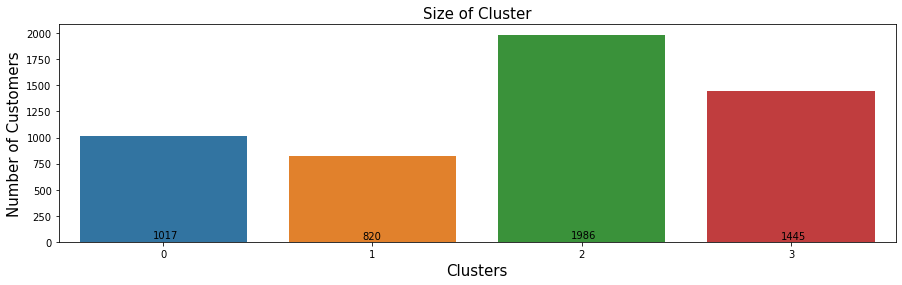

In [175]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= data1, x= 'Cluster')
fig.set_size_inches(20, 7)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('Number of Customers', fontsize = 15)

# add values in the graph
# 'x' and 'y' assigns the position to the text
# 's' represents the text on the plot
plt.text(x = -0.05, y =39, s = np.unique(new_clusters.labels_, return_counts=True)[1][0])
plt.text(x = 0.95, y =24, s = np.unique(new_clusters.labels_, return_counts=True)[1][1])
plt.text(x = 1.95, y =37, s = np.unique(new_clusters.labels_, return_counts=True)[1][2])
plt.text(x = 2.95, y =22, s = np.unique(new_clusters.labels_, return_counts=True)[1][3])

# display the plot
plt.show()

In [176]:
# Cluster Profiling

data1_profiling=data1.groupby('Cluster').mean()
cluster_frequency=data1["Cluster"].value_counts().sort_index()
data1_profiling['Cluster Count']=cluster_frequency
data1_profiling

,Academic_Score,Score_on_Plays_Made,Missed_Play_Score,School_Score,Overall_Score,Injury_Propensity_Low,Injury_Propensity_Moderate,Injury_Propensity_Normal,School_Type_B,School_Type_C,School_Type_D,Region_Southern,Region_Western,Scholarship,Cluster Count
Cluster,,,,,,,,,,,,,,,
0,7.665388,0.488053,0.244867,0.629513,10.483563,0.770895,0.006883,0.209440,0.000983,0.956735,0.004916,0.138643,0.447394,0.946903,1017
1,7.944634,0.379037,0.374232,0.576165,9.577581,0.176829,0.056098,0.230488,0.000000,0.000000,0.952439,0.318293,0.287805,0.546341,820
2,6.916918,0.271473,0.332611,0.483364,10.028548,0.224572,0.373615,0.183787,0.000000,0.973313,0.000000,0.399295,0.123364,0.135952,1986
3,6.598512,0.276820,0.316689,0.486176,11.692768,0.656055,0.067820,0.273356,1.000000,0.000000,0.000000,0.147405,0.360554,0.173010,1445


1. From the cluster 0 we can find that students having good Academic score and Overall Score is from schooltype C got a Scholarship and having low injuries
2. From the cluster 1 we can find that students having good Academic score and Overall Score is from schooltype D got a Scholarship and have normal injuries
3. From the cluster 2 we can find that students having good Academic score and Overall Score is again from schooltype C got a Scholarship and have moderate injuries
4. From the cluster 1 we can find that students having good Academic score and Overall Score is from schooltype B got a Scholarship and have low injuries

So from this we can get an inference that students from School type can be given more importance during selection process and next importance can be given to school type B.

Also this inference can change if we collect more  samples as naturally in this datatset we have more number of datatpoints belongs to SchoolType C


#**LOGISTIC REGRESSION**

In [177]:
import statsmodels.formula.api as sm
data.columns

Index(['Academic_Score', 'Score_on_Plays_Made', 'Missed_Play_Score',
       'School_Score', 'Overall_Score', 'Scholarship', 'Injury_Propensity_Low',
       'Injury_Propensity_Moderate', 'Injury_Propensity_Normal',
       'School_Type_B', 'School_Type_C', 'School_Type_D', 'Region_Southern',
       'Region_Western'],
      dtype='object')

In [178]:
formula_1='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity_Low+Injury_Propensity_Moderate+Injury_Propensity_Normal+School_Type_B+School_Type_C+School_Type_D+Region_Southern+Region_Western'


In [179]:
Logistic_1 = sm.logit(formula=formula_1,data=data).fit()


Optimization terminated successfully.
         Current function value: 0.444010
         Iterations 6


In [180]:
Logistic_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 5268
Model:                          Logit   Df Residuals:                     5254
Method:                           MLE   Df Model:                           13
Date:                Mon, 24 May 2021   Pseudo R-squ.:                  0.3243
Time:                        16:42:07   Log-Likelihood:                -2339.0
converged:                       True   LL-Null:                       -3461.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -8.5568      0.568    -15.063      0.000      -9.670      -7.443
Academic_Score                 0.4301      0.044      9.765      0.000       0.344       0.516
Score_on_Plays_Made            5.1126      0.323     15.833      0.000       4.480       5.745
Missed_Play_Score             -1.4614      0.345     -4.233      0.000      -2.138      -0.785
School_Score                   2.8541      0.313      9.123      0.000       2.241       3.467
Overall_Score                  0.2004      0.045      4.488      0.000       0.113       0.288
Injury_Propensity_Low          1.6779      0.150     11.165      0.000       1.383       1.972
Injury_Propensity_Moderate     0.5662      0.157      3.616      0.000       0.259       0.873
Injury_Propensity_Normal       1.2244      0.154      7.941      0.000       0.922       1.527
School_Type_B                 -2.1160      0.332     -6.378      0.000      -2.766      -1.466
School_Type_C                 -0.8168      0.291     -2.811      0.005      -1.386      -0.247
School_Type_D                  0.2617      0.279      0.940      0.347      -0.284       0.808
Region_Southern               -0.4816      0.091     -5.273      0.000      -0.661      -0.303
Region_Western                 0.0161      0.092      0.175      0.861      -0.164       0.196
==============================================================================================
"""

In [181]:
#print('The pseudo r-square is calculated as 1-(Log-Likelihood/LL-Null) which gives us the result',1 - (model_1.llf/model_1.llnull),'\n''Same as what the model has given us:',model_1.prsquared)


In [182]:
#print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))


In [183]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

vif_cal(input_data=data.drop('Scholarship',axis=1))


Academic_Score  VIF =  1.71
Score_on_Plays_Made  VIF =  1.61
Missed_Play_Score  VIF =  1.53
School_Score  VIF =  1.3
Overall_Score  VIF =  2.01
Injury_Propensity_Low  VIF =  3.55
Injury_Propensity_Moderate  VIF =  2.08
Injury_Propensity_Normal  VIF =  2.6
School_Type_B  VIF =  13.89
School_Type_C  VIF =  12.67
School_Type_D  VIF =  6.12
Region_Southern  VIF =  1.23
Region_Western  VIF =  1.26


Dropping the variables which is having more than 5 VIF value
1. School_Type_B 
2. School_Type_C
3. School_Type_D 

In [184]:
formula_2='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity_Low+Injury_Propensity_Moderate+Injury_Propensity_Normal+Region_Southern+Region_Western'


In [185]:
Logistic_2 = sm.logit(formula=formula_2,data=data).fit()


Optimization terminated successfully.
         Current function value: 0.457978
         Iterations 6


In [186]:
Logistic_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 5268
Model:                          Logit   Df Residuals:                     5257
Method:                           MLE   Df Model:                           10
Date:                Mon, 24 May 2021   Pseudo R-squ.:                  0.3030
Time:                        16:42:07   Log-Likelihood:                -2412.6
converged:                       True   LL-Null:                       -3461.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -7.7234      0.470    -16.442      0.000      -8.644      -6.803
Academic_Score                 0.6203      0.040     15.513      0.000       0.542       0.699
Score_on_Plays_Made            5.9718      0.313     19.057      0.000       5.358       6.586
Missed_Play_Score             -1.4204      0.337     -4.219      0.000      -2.080      -0.761
School_Score                   3.9417      0.294     13.388      0.000       3.365       4.519
Overall_Score                 -0.1305      0.034     -3.865      0.000      -0.197      -0.064
Injury_Propensity_Low          0.8665      0.116      7.493      0.000       0.640       1.093
Injury_Propensity_Moderate     0.1421      0.134      1.064      0.287      -0.120       0.404
Injury_Propensity_Normal       0.6051      0.130      4.653      0.000       0.350       0.860
Region_Southern               -0.4851      0.090     -5.404      0.000      -0.661      -0.309
Region_Western                -0.0316      0.089     -0.353      0.724      -0.207       0.144
==============================================================================================
"""

In [187]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

vif_cal(input_data=data.drop(['Scholarship','School_Type_C','School_Type_B','School_Type_D'],axis=1))

Academic_Score  VIF =  1.4
Score_on_Plays_Made  VIF =  1.51
Missed_Play_Score  VIF =  1.49
School_Score  VIF =  1.19
Overall_Score  VIF =  1.24
Injury_Propensity_Low  VIF =  2.46
Injury_Propensity_Moderate  VIF =  1.72
Injury_Propensity_Normal  VIF =  2.18
Region_Southern  VIF =  1.23
Region_Western  VIF =  1.24


#### Now Drop the Variables which is having high p value
1. Injury_Propensity_Moderate
2. Region_Western

In [188]:
formula_3='Scholarship~Academic_Score+Score_on_Plays_Made+Missed_Play_Score+School_Score+Overall_Score+Injury_Propensity_Normal+Injury_Propensity_Low+Region_Southern'


In [189]:
Logistic_3 = sm.logit(formula=formula_3,data=data).fit()

Optimization terminated successfully.
         Current function value: 0.458096
         Iterations 6


In [190]:
Logistic_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Scholarship   No. Observations:                 5268
Model:                          Logit   Df Residuals:                     5259
Method:                           MLE   Df Model:                            8
Date:                Mon, 24 May 2021   Pseudo R-squ.:                  0.3028
Time:                        16:42:07   Log-Likelihood:                -2413.2
converged:                       True   LL-Null:                       -3461.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -7.7088      0.469    -16.427      0.000      -8.629      -6.789
Academic_Score               0.6207      0.040     15.529      0.000       0.542       0.699
Score_on_Plays_Made          5.9557      0.309     19.255      0.000       5.349       6.562
Missed_Play_Score           -1.4410      0.336     -4.289      0.000      -2.099      -0.783
School_Score                 3.9358      0.294     13.382      0.000       3.359       4.512
Overall_Score               -0.1246      0.033     -3.746      0.000      -0.190      -0.059
Injury_Propensity_Normal     0.5247      0.107      4.901      0.000       0.315       0.735
Injury_Propensity_Low        0.7882      0.090      8.744      0.000       0.612       0.965
Region_Southern             -0.4746      0.084     -5.644      0.000      -0.639      -0.310
============================================================================================
"""

In [191]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

vif_cal(input_data=data.drop(['Scholarship','School_Type_C','School_Type_B','School_Type_D','Region_Western','Injury_Propensity_Moderate'],axis=1))

Academic_Score  VIF =  1.4
Score_on_Plays_Made  VIF =  1.47
Missed_Play_Score  VIF =  1.49
School_Score  VIF =  1.19
Overall_Score  VIF =  1.21
Injury_Propensity_Low  VIF =  1.55
Injury_Propensity_Normal  VIF =  1.52
Region_Southern  VIF =  1.09


#**SPLIT THE DATA INTO TRAINNING AND TEST**

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
Train,Test = train_test_split(data,test_size=0.3,random_state=1,stratify=data['Scholarship'])


In [54]:
print(Train.shape)
print(Test.shape)

(3687, 14)
(1581, 14)


In [55]:
print(Train['Scholarship'].value_counts(1))
print(Test['Scholarship'].value_counts(1))


0    0.633577
1    0.366423
Name: Scholarship, dtype: float64
0    0.633144
1    0.366856
Name: Scholarship, dtype: float64


#**BUILD THE LOGISTIC REGRESSION MODEL**

In [56]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='newton-cg',penalty='none')


MODEL 1

In [57]:
model_1 = LR.fit(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern','Region_Western']],Train['Scholarship'])


In [58]:
print('Accuracy Score of Model 1:',model_1.score(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern','Region_Western']],Train['Scholarship']))


Accuracy Score of Model 1: 0.8407919717927854


In [59]:
model_1_test_class = model_1.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern','Region_Western']])
model_1_test_probabilities = model_1.predict_proba(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern','Region_Western']])

MODEL 2


In [60]:
model_2 = LR.fit(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','Region_Southern','Region_Western']],Train['Scholarship'])


In [61]:
print('Accuracy Score of Model 2:',model_2.score(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','Region_Southern','Region_Western']],Train['Scholarship']))


Accuracy Score of Model 2: 0.8294005966910768


In [62]:
model_2_test_class = model_2.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','Region_Southern','Region_Western']])
model_2_test_probabilities = model_2.predict_proba(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','Region_Southern','Region_Western']])

MODEL 3

In [63]:
model_3 = LR.fit(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Normal','Region_Southern']],Train['Scholarship'])


In [64]:
print('Accuracy Score of Model 3:',model_3.score(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Normal','Region_Southern']],Train['Scholarship']))


Accuracy Score of Model 3: 0.8299430431244914


In [65]:
model_3_test_class = model_3.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Normal','Region_Southern']])
model_3_test_probabilities = model_3.predict_proba(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Normal','Region_Southern']])

**MODEL PERFORMANCE COMPARISON**

In [66]:
from sklearn import metrics
from pylab import rcParams
rcParams['figure.figsize'] = 15,4

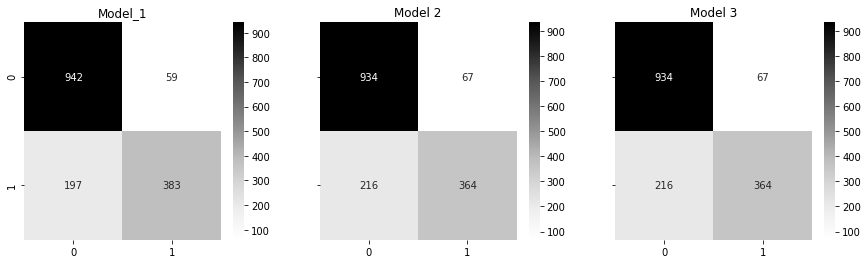

In [67]:
f,a =  plt.subplots(1,3,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_1_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Model_1')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_2_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Model 2');

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_3_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][2]);
a[0][2].set_title('Model 3');

In [68]:
print('Model 1')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_1_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Model 2')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_2_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('Model 3')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_3_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

Model 1
True Negative: 942 
False Positives: 59 
False Negatives: 197 
True Positives: 383 


Model 2
True Negative: 934 
False Positives: 67 
False Negatives: 216 
True Positives: 364 


Model 3
True Negative: 934 
False Positives: 67 
False Negatives: 216 
True Positives: 364


In [69]:
print('Model 1')
print(metrics.classification_report(Test['Scholarship'],model_1_test_class),'\n')

print('Model 2')
print(metrics.classification_report(Test['Scholarship'],model_2_test_class),'\n')

print('Model 3')
print(metrics.classification_report(Test['Scholarship'],model_3_test_class))

Model 1
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1001
           1       0.87      0.66      0.75       580

    accuracy                           0.84      1581
   macro avg       0.85      0.80      0.81      1581
weighted avg       0.84      0.84      0.83      1581
 

Model 2
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1001
           1       0.84      0.63      0.72       580

    accuracy                           0.82      1581
   macro avg       0.83      0.78      0.79      1581
weighted avg       0.82      0.82      0.81      1581
 

Model 3
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1001
           1       0.84      0.63      0.72       580

    accuracy                           0.82      1581
   macro avg       0.83      0.78      0.79      1581
weighted avg       0.82      0.82      0.81   

Model 1 AUC: 0.81311


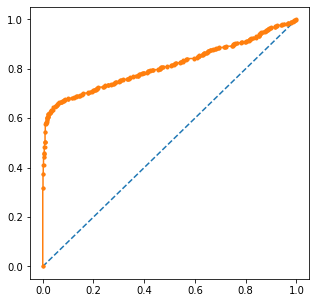

Model 2 AUC: 0.80599


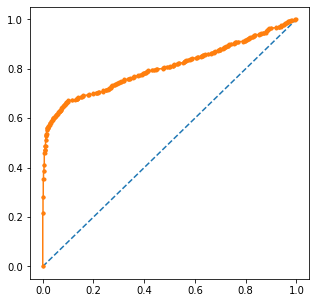

Model 3 AUC: 0.80629


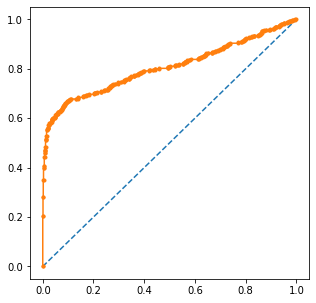

In [194]:
from pylab import rcParams
rcParams['figure.figsize'] = 5,5

# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_1_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# AUC and ROC for the model 2


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],model_2_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 2 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_2_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the model 3


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],model_3_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('Model 3 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_3_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#**LDA MODEL**

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()

MODEL 1

In [72]:
model_LDA1 = LDA.fit(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern','Region_Western']],Train['Scholarship'])

In [73]:
print('Accuracy Score of Model 1:',model_LDA1.score(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern','Region_Western']],Train['Scholarship']))


Accuracy Score of Model 1: 0.8424193110930296


In [74]:
model_LDA1_test_class = model_LDA1.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern','Region_Western']])
model_LDA1_test_probabilities = model_LDA1.predict_proba(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','School_Type_B','School_Type_C','School_Type_D','Region_Southern','Region_Western']])

MODEL 2

In [75]:
model_LDA2 = LDA.fit(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','Region_Southern','Region_Western']],Train['Scholarship'])

In [76]:
print('Accuracy Score of Model 2:',model_LDA2.score(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','Region_Southern','Region_Western']],Train['Scholarship']))


Accuracy Score of Model 2: 0.8310279359913209


In [77]:
model_LDA2_test_class = model_LDA2.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','Region_Southern','Region_Western']])
model_LDA2_test_probabilities = model_LDA2.predict_proba(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Moderate','Injury_Propensity_Normal','Region_Southern','Region_Western']])

MODEL 3

In [78]:
model_LDA3 = LDA.fit(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Normal','Region_Southern']],Train['Scholarship'])

In [79]:
print('Accuracy Score of Model 3:',model_LDA3.score(Train[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Normal','Region_Southern']],Train['Scholarship']))


Accuracy Score of Model 3: 0.8315703824247356


In [80]:
model_LDA3_test_class = model_LDA3.predict(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Normal','Region_Southern']])
model_LDA3_test_probabilities = model_LDA3.predict_proba(Test[['Academic_Score','Score_on_Plays_Made','Missed_Play_Score','School_Score','Overall_Score','Injury_Propensity_Low','Injury_Propensity_Normal','Region_Southern']])

**LDA MODEL PERFORMANCE COMPARISON**

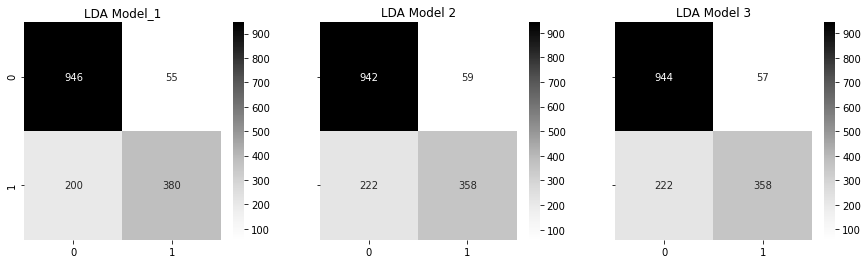

In [81]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,4
f,a =  plt.subplots(1,3,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_LDA1_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('LDA Model_1')

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_LDA2_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('LDA Model 2');

plot_1 = sns.heatmap((metrics.confusion_matrix(Test['Scholarship'],model_LDA3_test_class)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][2]);
a[0][2].set_title('LDA Model 3');

In [82]:
print('LDA Model 1')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_LDA1_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('LDA Model 2')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_LDA2_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

print('LDA Model 3')
tn, fp, fn, tp = metrics.confusion_matrix(Test['Scholarship'],model_LDA3_test_class).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

LDA Model 1
True Negative: 946 
False Positives: 55 
False Negatives: 200 
True Positives: 380 


LDA Model 2
True Negative: 942 
False Positives: 59 
False Negatives: 222 
True Positives: 358 


LDA Model 3
True Negative: 944 
False Positives: 57 
False Negatives: 222 
True Positives: 358


In [83]:
print('LDA Model 1')
print(metrics.classification_report(Test['Scholarship'],model_LDA1_test_class),'\n')

print('LDA Model 2')
print(metrics.classification_report(Test['Scholarship'],model_LDA2_test_class),'\n')

print('LDA Model 3')
print(metrics.classification_report(Test['Scholarship'],model_LDA3_test_class))

LDA Model 1
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      1001
           1       0.87      0.66      0.75       580

    accuracy                           0.84      1581
   macro avg       0.85      0.80      0.81      1581
weighted avg       0.84      0.84      0.83      1581
 

LDA Model 2
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1001
           1       0.86      0.62      0.72       580

    accuracy                           0.82      1581
   macro avg       0.83      0.78      0.79      1581
weighted avg       0.83      0.82      0.81      1581
 

LDA Model 3
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1001
           1       0.86      0.62      0.72       580

    accuracy                           0.82      1581
   macro avg       0.84      0.78      0.80      1581
weighted avg       0.83      0.82 

LDA Model 1 AUC: 0.81139


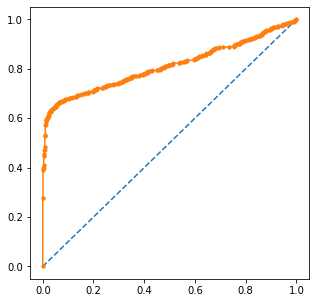

LDA Model 2 AUC: 0.80593


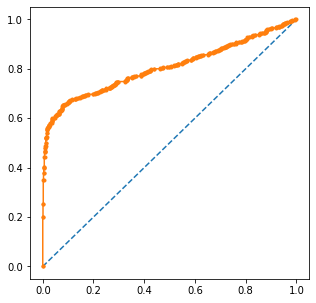

LDA Model 3 AUC: 0.80616


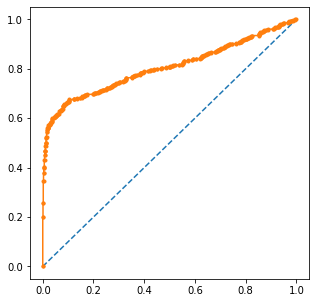

In [195]:
# AUC and ROC for the model 1
from pylab import rcParams
rcParams['figure.figsize'] = 5,5

# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],model_LDA1_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA Model 1 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_LDA1_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# AUC and ROC for the model 2


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],model_LDA2_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA Model 2 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_LDA2_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# AUC and ROC for the model 3


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(Test['Scholarship'],model_LDA3_test_probabilities[:, 1])#keeping only the probabilities for the desired class outcome
print('LDA Model 3 AUC: %.5f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(Test['Scholarship'],model_LDA3_test_probabilities[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()